##### Code Description
In this code, two methods are used to solve a non-stationary 10-armed bandit problem.
The first method uses sample averages as estimators of the expected values of each action. In other words, the learning rate (alpha) is equal to 1/n in each time step where n indicates the time step.
In the second method, we use a constant learning rate.

Values of the actions are set to zero initially, and a noise of Normal distribution(0, 0.01) is added to the values in every time step.

Two implementations are available for the function `avgReward_optimalAction`. If the `vectorized` argument of the function is set to True, the vectorized implementation will be used.The vectorized implementation reduces the execution time by almost 94%.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [50]:
def avgReward_optimalAction(runs, steps, k, var, noise_var, epsilon, type, vectorized = True):
    
    expected_reward = np.zeros(steps)
    optimal_action_count = np.zeros(steps)

    if vectorized:
        q = np.zeros((runs, k))
        Q = np.zeros((runs, k))
        N = np.zeros((runs, k))

        for t in range(steps):

            i = Q.argmax(axis = 1).astype(int) + np.multiply((np.random.rand(runs) < epsilon).astype(int),(np.random.randint(0, k, runs) - Q.argmax(axis = 1)))

            r = np.random.normal(q[np.arange(runs), i], var)

            optimal_action_count[t] = np.sum((i == q.argmax(axis = 1)).astype(float))

            N[np.arange(runs), i] += 1

            if type == "sample-average":
                alpha = 1.0 / N[np.arange(runs), i]
            elif type == "constant-step-size":
                alpha = np.full(runs, 0.1)
            Q[np.arange(runs), i] += np.multiply(alpha, (r - Q[np.arange(runs), i]))

            expected_reward[t] = np.sum(epsilon * Q.sum(axis = 1) / k + (1 - epsilon) * Q.max(axis = 1))

            q += np.random.normal(0, noise_var, (runs, k))
    
    else:
        for _ in range(runs):

            q = np.zeros(k)
            Q = np.zeros(k)
            N = np.zeros(k)

            for t in range(steps):

                if np.random.rand() < epsilon:
                    i = np.random.randint(k)
                else:
                    i = np.argmax(Q)
                r = np.random.normal(q[i], var)

                if i == np.argmax(q):
                    optimal_action_count[t] += 1

                N[i] += 1

                if type == "sample-average":
                    alpha = 1.0 / N[i]
                elif type == "constant-step-size":
                    alpha = 0.1

                Q[i] += alpha * (r - Q[i])

                expected_reward[t] += epsilon * Q.sum() / k + (1 - epsilon) * Q.max()

                q += np.random.normal(0, noise_var, k)

    optimal_action_count /= runs
    expected_reward /= runs

    return expected_reward, optimal_action_count

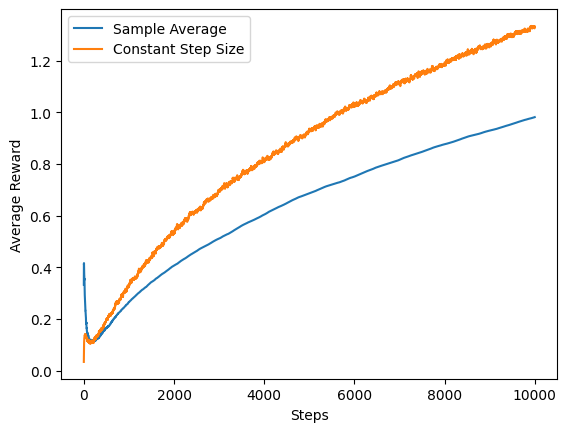

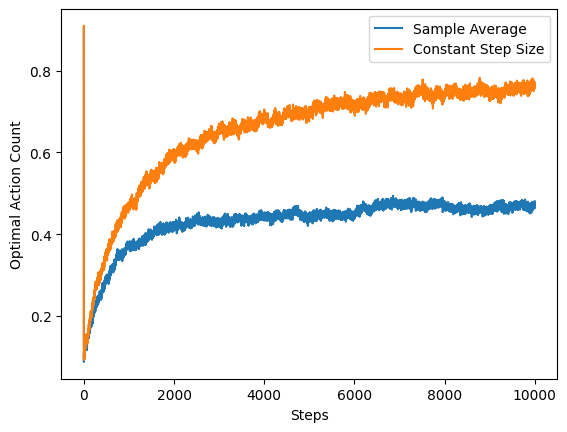

In [54]:
steps = 10000
epsilon = 0.1
var = 1.0
noise_var = 0.01
runs = 2000
k = 10

avgReward_sample_average, OAC_sample_average = avgReward_optimalAction(runs, steps, k, var, noise_var, epsilon, "sample-average", True)
avgReward_constant_step_size, OAC_constant_step_size = avgReward_optimalAction(runs, steps, k, var, noise_var, epsilon, "constant-step-size", True)
x = np.arange(steps)

plt.plot(x, avgReward_sample_average, label='Sample Average')
plt.plot(x, avgReward_constant_step_size, label='Constant Step Size')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.show()

plt.plot(x, OAC_sample_average, label='Sample Average')
plt.plot(x, OAC_constant_step_size, label='Constant Step Size')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Optimal Action Count')
plt.show()